In [1]:
import pandas as pd

result_df = pd.read_csv("model1_LightGBM_finetune_5e-6_freeze_disease.csv")
result_df = result_df[result_df["test"] == 1]
result_df = result_df[
    result_df["model_short"].str.contains("model1_freeze_disease_encoder")
]
result_df["step"] = result_df["model_short"].apply(lambda x: int(x.split("_step_")[-1].split("_")[0]))
disgenet_test_result_df = result_df[["step", "mse"]]
disgenet_test_result_df["set"]="model1+lightgbm test"
disgenet_test_result_df.mse.min()

/tmp/ipykernel_86769/2676355142.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disgenet_test_result_df["set"]="model1+lightgbm test"


0.0150856423098176

In [2]:
result_df = pd.read_csv("model1_LightGBM_finetune_5e-6_freeze_disease.csv")
result_df = result_df[result_df["test"] == 0]
result_df = result_df[["mse", "model_short"]]
result_df = result_df.dropna() 
result_df = result_df[
    result_df["model_short"].str.contains("model1_freeze_disease_encoder")
]
result_df["step"] = result_df["model_short"].apply(lambda x: int(x.split("_step_")[-1].split("_")[0]))
disgenet_full_result_df = result_df[["step", "mse"]]
disgenet_full_result_df["set"]="model1+lightgbm full"
disgenet_full_result_df.mse.min()

0.0114417474929205

In [3]:
result_df = disgenet_test_result_df.append(disgenet_full_result_df)
plot_df = result_df.sort_values(by=['step'])
plot_df["step"] = plot_df["step"].apply(lambda x: str(x)[:-3]+"K")
plot_df.mse.min()

0.0114417474929205

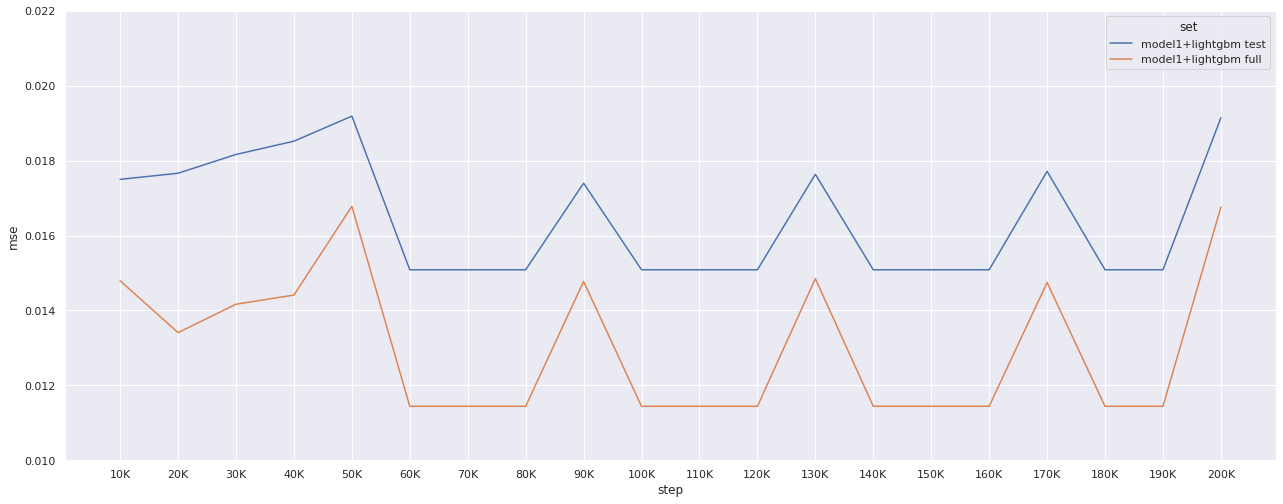

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set(style="darkgrid")    
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 21.7,8.27
palette = sns.color_palette("bright", 4)

g = sns.lineplot(
    data=plot_df,
    # kind="bar",
    x="step",
    y="mse",
    # ci="sd",
    hue="set",
    # palette="dark",
    # height=8,
    # aspect=2,
    # alpha=0.6,
)
# g.despine(left=True)
g.set(ylim=(0.010, 0.022))

# g.set_axis_labels("Step", "MSE")
# g.fig.suptitle("Performance of fine-tuning Model1+lightGBM over steps")
plt.show()

In [14]:
import transformers

In [15]:
transformers.__version__

'4.5.1'